In [1]:
%matplotlib inline

In [2]:
# import dependencies
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [3]:
data = pd.read_csv('Automobile_price_data.csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Data prepration

Data preperation is a key step in the machine learning pipeline. 

**Goal**: Ensure that machine learning algorithms work in an optimal way.
Data preperation is vital to good machine learning performance. Good data preperation can allow simple machine learning algorithms to work well.

**Data Preperation Steps**: 
- Exploring to understand data problems.
- Remove duplicates.
- Treat missing values.
- Treat errors and outliers.
- Scale features.
- Split dataset
- Visualization to check results.

In [4]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Recode the columns names

In [5]:
data.columns = [str.replace('-','_') for str in data.columns]

## Exploring The Dataset

In [6]:
data.isnull().any()

symboling            False
normalized_losses    False
make                 False
fuel_type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

In [7]:
# Missing values are coded with '?'
(data.astype(np.object) == '?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [8]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [9]:
# Counting missing valus in columns
for col in data.columns:
    if data[col].dtype == object:
        count = 0
        count = [count + 1 for i in data[col] if i == '?']
        print(col + ': '+ str(sum(count)))

normalized_losses: 41
make: 0
fuel_type: 0
aspiration: 0
num_of_doors: 2
body_style: 0
drive_wheels: 0
engine_location: 0
engine_type: 0
num_of_cylinders: 0
fuel_system: 0
bore: 4
stroke: 4
horsepower: 2
peak_rpm: 2
price: 4


In [10]:
# Droping column with most frequent missing value
del data["normalized_losses"]

In [11]:
# Removing rows with missing values
cols = ['price', 'bore', 'stroke',
          'horsepower', 'peak_rpm']
for column in cols:
    data.loc[data[column]=='?',column] = np.nan
data.dropna(axis = 0, inplace = True)
data.shape

(195, 25)

In [12]:
# Convert some columns to numeric values
cols = ['bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
for column in cols:
    data[column] = pd.to_numeric(data[column])
data[cols].dtypes

bore          float64
stroke        float64
horsepower      int64
peak_rpm        int64
price           int64
dtype: object

# Overview of Feature Engineering

The general ideas good features are the key to good machine learning performance. If we have features that are highly predicitve of the label we're trying to predict, we will have good machine learning performance if not, it may just be noise garbage in garbage out and we may not be getting anywhere.
**Goal** is to develop highly predictive features. 

**Feature Engineering Steps**:
- Exploring to understand data relationships
- Transform features
- Compute interaction terms
- Visualization to check result
- Test with machine learning model

## Transfrom Features
**Why transfrom features?**
- Improve distribution properties
- More covariate (characteristics of the participants in an experiment) with label

**Common transformations**:
- Log, exponential, square, square root, variance, etc.
- Difference, cumulative sum.
- Nonlinear transformed features are not colinear.

**Note**: Just keep in mind that nonlinear transformed features are not going to be colinear. That is they're not going to necessairly have high correlation with original one. If you have numeric feature and it's square value squared, they're not going to be that correlated.

## Interaction Terms

Let's start with an example. Let's say we want to predict the number of people riding a bus route. That might be important for a transit company. Well, it depends on more that one feature in the data. It probably depends on the time of day and whether it's holiday or not. We can imagine on a work day, there are certain directions where there's a lot of people neeeding to say get to a downtown area and the buses are going to have a higher load. But if it turns out to be a Sunday or a national holiday or something, the time profile there still may be a lot of people going downtown to shop or go resturants or movies or something else. So the time of the day they're going is different and maybe the total volumes are different. This is example of an interaction, the interaction is between time of day and the holiday and we call that **Interaction term**.

**Compute interaction terms**:
- Mean, Median, etc.

**Aggregating categorical variables**

When a dataset contains categorical variables these need to be investigated to ensure that each category has sufficient samples. It is commonly the case that some categories may have very few samples, or have so many similar categories as to be meaningless.


In [13]:
data['num_of_cylinders'].value_counts()

four      155
six        24
five       10
eight       4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

We notice that there is only one car with three and twelve cylinders. There are only four cars with 8 cylinders and 10 cars with five cylinders. There categories will not have statistically significant difference in predicting vehicle price, they need to be aggregated.  

In [14]:
cylinders_categories = {'three': 'Three_Four',
                        'four': 'Three_Four',
                        'five': 'Five_Six',
                        'six': 'Five_Six',
                        'eight':'Eight_Twelve',
                        'twelve':'Eight_Twelve'}
data['num_of_cylinders'] = [cylinders_categories[i] for i in data['num_of_cylinders']]
data['num_of_cylinders'].value_counts()

Three_Four      156
Five_Six         34
Eight_Twelve      5
Name: num_of_cylinders, dtype: int64

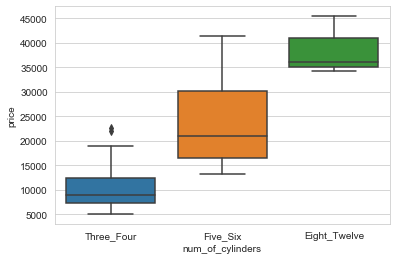

In [15]:
def plot_box(data, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=data)
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()
    
plot_box(data, 'num_of_cylinders')

We can see there's actually quite a bit of seperation by these new categories. We've gone from categories that were almost meaningless. Three new categories that seemed to be well seperated by price. 

In [16]:
data['body_style'].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

As we can see, we have the same scanario here. Two categories have a limited number of cases. They can be aggregated using the same approach as we used for number of cylinders.

In [17]:
body_sytle_categories = {'sedan':'sedan', 
                         'hatchback':'hatchback', 
                         'wagon':'wagon',
                         'hardtop':'hardtop_convertible',
                         'convertible':'hardtop_convertible'}

data['body_style'] = [body_sytle_categories[x] for x in data['body_style']]
data['body_style'].value_counts()

sedan                  94
hatchback              63
wagon                  24
hardtop_convertible    14
Name: body_style, dtype: int64

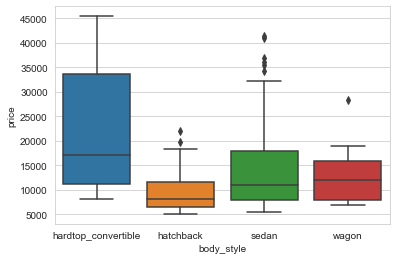

In [18]:
def plot_box(data, col, col_y = 'price'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=data)
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()
    
plot_box(data, 'body_style')

The `hardtop_convert` category does have wider range of price compare to the other body styles.

### Transforming numeric variables

To improve performance of machine learning models transformations of the values are often applied. Typically, transformations are used to make the relationships between variables more linear. In other cases, transformations are performed to make distributions closer to Normal, or at least more symmetric. These transformations can include taking logarithms, exponential transformations and power transformations.



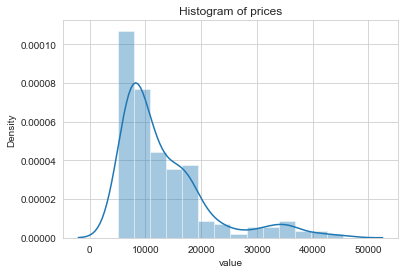

In [23]:
def hist_plot(vals, lab):
    sns.distplot(vals)
    plt.title("Histogram of "+ lab)
    plt.xlabel("value")
    plt.ylabel("Density")
    
hist_plot(data['price'], 'prices')

We're going to look at whether we should transform our numeric variable or not. In this case, we're going to look at just price. Price is very important variable. As we had already nortice, is strongly right_skewed. As we can see there's a big distribution of low price cars on the left side

### Transforming price variable

In [24]:
data['log_price'] = np.log(data['price'])
data

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,log_price
0,3,alfa-romero,gas,std,two,hardtop_convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,alfa-romero,gas,std,two,hardtop_convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,9.731809
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,9.854560
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,9.975110
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,10.019936


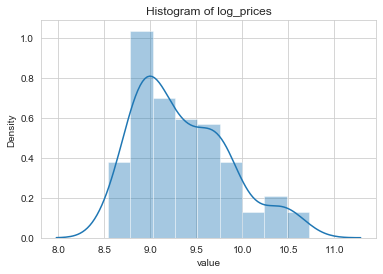

In [25]:
hist_plot(data['log_price'], 'log_prices')

Here's the transformed value. It's definitely more symmetric. It's still got significant right skew but it's not as extreme . So, this label is label is much better in general because it is a bit more symmetric.